In [117]:
import sqlite3 as lite
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix

In [118]:
con = lite.connect('social_stats.db')
cur = con.cursor()

In [150]:
#with con:
#    cur.execute("PRAGMA table_info(gdp)")
#    print(cur.fetchall())

In [151]:
#creates my sql join statement
join_command = 'SELECT country, year, men_years, women_years, total_years, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010 FROM education LEFT OUTER JOIN gdp ON education.country = gdp.country_name;'


In [121]:
#executes join and creates a dataframe
with con:
    cur.execute(join_command)
    data = cur.fetchall()
df_combined = pd.DataFrame(data)

In [149]:
#df_combined

In [132]:
#renames column headers
df_combined_column_named = df_combined.rename(columns={0: 'country', 1: 'year', 2: 'men_ed_yrs', 3: 'women_ed_yrs', 4: 'total_ed_yrs', 5: '1999', 6: '2000', 7: '2001', 8: '2002', 9: '2003', 10: '2004', 11: '2005', 12: '2006', 13: '2007', 14: '2008', 15: '2009', 16: '2010'})

In [146]:
#does the log transformation on GDP
log_gdp = np.log(df_combined_column_named['2006'])

In [156]:
# sets x and y
X = df_combined_column_named[['men_ed_yrs', 'women_ed_yrs', 'total_ed_yrs']]
y = log_gdp

In [157]:
#adds the constant to x, and creates the OLS
X = sm.add_constant(X)
est = sm.OLS(y, X, missing="drop").fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2006   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     8.439
Date:                Tue, 24 May 2016   Prob (F-statistic):           5.94e-05
Time:                        09:22:30   Log-Likelihood:                -184.00
No. Observations:                  86   AIC:                             376.0
Df Residuals:                      82   BIC:                             385.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           19.4910      1.221     15.968      0.000        17.063    21.919
men_ed_yrs       0.5826      0.346      1.681      0.096        -0.107     1.272
women_ed_yrs     0.3567      0.292      1.221      0.226        -0.225     0.938
total_ed_yrs    -0.5925      0.511     -1.159      0.250        -1.609     0.424
==============================================================================
Omnibus:                        1.056   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.865
Skew:                          -0.245   Prob(JB):                        0.649
Kurtosis:                       2.976   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#creates a dataframe with log values of GDP
df_log = pd.DataFrame(X)

In [140]:
#combines the dataframes of x and y
result = pd.concat([df_log, y], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b0eb690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c20f8d0>]], dtype=object)

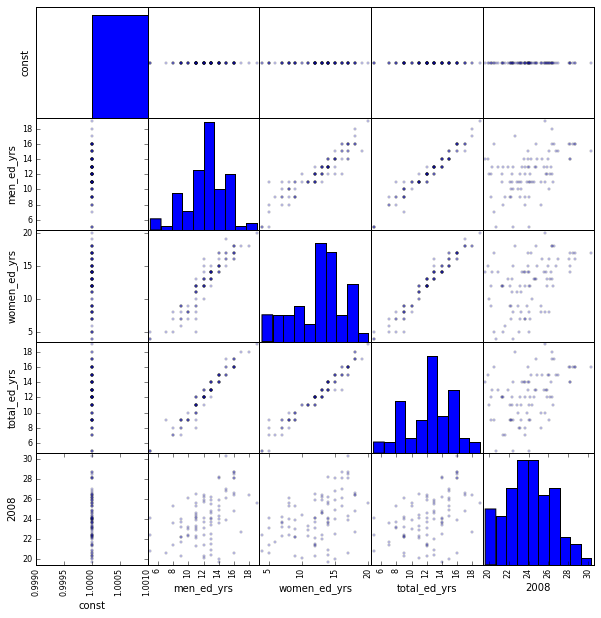

In [155]:
#creates a scatter matrix
%matplotlib inline
scatter_matrix(result, alpha=0.2, figsize=(10,10))

There appears to be some relationship between GDP and education graphically. OLS confirms that there is a positive relationship between men ed and gdp and womens ed and gdp. However, it is finding a negative relationship betweetn total education and gdp. I suspect this is the result of the fact that total education is derived from men and women's education. 

Despite these relationships, and based on reviewing the confidence interviews, we cannot view these relationships as statisticallys significant. There is just two much noise.

One major problem is that the absolute size of GDP is likely more strongly impacted by the actual size of the population, among many other issues. The comparison is a little wonky, since we are comparing avg educational age with abosolute GDP. It would make more sense to compare per capita GDP.